In [67]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math
# import sys
# np.set_printoptions(threshold=False)

# Question 1
## You are provided with an image, einstein.jpg, and your task is to apply zooming with a factor of 2 using the following two methods: Pixel replication and Zero-order hold.

### A) Describe each of the two methods (Pixel replication, Zero-order hold) for image zooming.

#### Pixel replication
Pixel replication is also known as nearest neighbor interpolation because using it we can only replicate the neighboring pixels. Let's see how this method work.
In the pixel replication method, new pixels are produced through the existing pixels or already given pixels of the input image. Every pixel of the input picture is replicated n times row-wise and n times column-wise, and the input image gets zoomed.

#### Zero-Order hold
The zero-order hold is also known as zoom twice because we can only zoom twice by this method.
We pick two adjacent elements from a row in the zero-order hold method. We then add these elements. After the addition, we divide the result by two. Then the resulting number is placed between the adjacent elements we picked earlier.


### B) Implement Python code to perform zooming in on the image 'einstein.jpg' using a zoom factor of 2 for each of the two methods. Provide step-by-step explanations of your code for each method.

In [68]:
# pixel replication method definition
def pixel_replication(factor_val, img_path):
    # read image using open cv
    original_img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
    # repeating all the cols using numpy repeat function which repeats all the elements that you specify based on the position of them in the matrix along the specified axis for example in this line this command repeats all elements along x axis based on the factor value
    new_image = np.repeat(original_img,[factor_val for i in range(original_img.shape[1])], axis= 1)
    # repeating all the elements along y axis based on the factor value
    new_image = np.repeat(new_image, [factor_val for i in range(original_img.shape[0])], axis=0)
    return new_image

In [244]:
def zero_order_hold(factor_val, img_path):
    original_image = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
    new_image = np.copy(original_image)
    for f in range(math.floor(factor_val / 2)):
        new_image =np.insert(new_image , range(1, new_image.shape[1]), 0, axis=1)
        for i in range(new_image.shape[0]):
            for j in range(new_image.shape[1]):
                if new_image[i, j] == 0:
                    new_image[i, j] = math.floor((new_image[i, j-1] + new_image[i,j + 1]) / 2 )
        new_image =np.insert(new_image , range(1, new_image.shape[0]), 0, axis=0)
        for i in range(new_image.shape[0]):
            for j in range(new_image.shape[1]):
                if new_image[i, j] == 0:
                    new_image[i, j] = math.floor((new_image[i - 1, j] + new_image[i + 1, j]) / 2 )
    return new_image

### C) For each of the two methods, discuss their advantages and disadvantages. Consider aspects such as image quality, computational complexity, and suitability for different types of images

#### Pixel Replication 

##### Advantages
This method is easy to implement as the pixels are copied into adjacent rows and columns.

##### Disadvantages
The image produced by this method is always too blurry because of the increased zooming factor. As the zooming factor increases, the image gets more blurred.

#### Zero-Order Hold

##### Advantages
This method does not produce a blurry image, unlike the other methods.

We can always double the image resolution without any special effort.

It is easy to implement with zero computation overhead.

##### Disadvantages

This method can only run on the power of two.

Because of the power two, it doesn't allow us to zoom images by custom resolution.



### D) Display the zoomed images for the two methods and report the results. Examine the effects of increasing the zoom factor (e.g., from 2 to 4) on image quality and detail preservation.

C:\Users\mahdi\AppData\Local\Temp\ipykernel_33060\871350306.py:9: RuntimeWarning: overflow encountered in scalar add
  new_image[i, j] = math.floor((new_image[i, j-1] + new_image[i,j + 1]) / 2 )
C:\Users\mahdi\AppData\Local\Temp\ipykernel_33060\871350306.py:14: RuntimeWarning: overflow encountered in scalar add
  new_image[i, j] = math.floor((new_image[i - 1, j] + new_image[i + 1, j]) / 2 )


Text(0.5, 1.0, 'Zero-Order Hold')

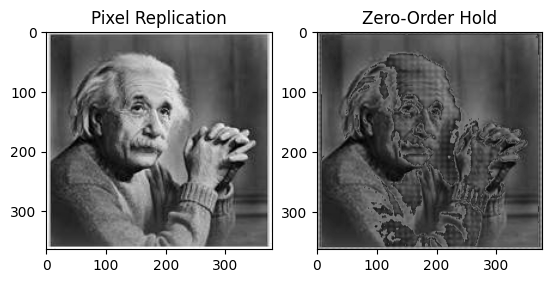

In [245]:
pixel_replication_image = pixel_replication(2, "imgs/einstein.jpg")
zero_order_hold_image = zero_order_hold(2, "imgs/einstein.jpg")

f, img_array_plot = plt.subplots(1,2)
img_array_plot[0].imshow(pixel_replication_image,cmap='gray')
img_array_plot[0].set_title("Pixel Replication")
img_array_plot[1].imshow(zero_order_hold_image, cmap='gray')
img_array_plot[1].set_title("Zero-Order Hold")

#### By Increasing the zoom factor the images get more blurry However zero-order hold method sustains the images details more than the pixel replication method

### E) Suggest an improved zooming method and compare its results with the two experimented methods.
Another method of zooming images is the k-times zooming method

K-times zooming is the most widely used and precise method because it covers the limitations of both pixel replication and zero-order hold zooming

K-times zooming is performed through the following steps:

1. We pick two adjacent pixels and subtract the smaller pixel from the greater one. The result of subtraction is also known as OP.

2. After this, we divide the output (OP) with k, the alphabet k from the name is the zooming factor, add the result to the smaller pixel picked earlier, and put this value between the adjacent pixels.

3. Again add the value (OP) to the value we got from the previous step and put the new value next to the previous put value.

4. We'll repeat this process till we successfully place k−1 values in the existing image.

Text(0.5, 1.0, 'k-zoomed')

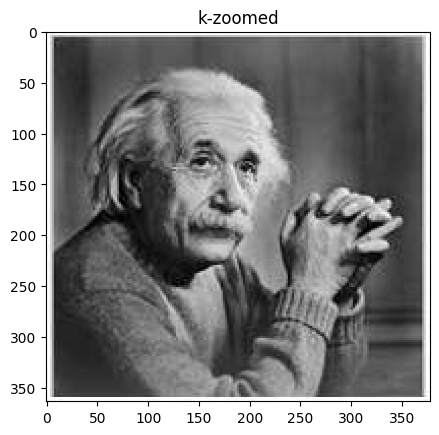

In [241]:
def k_times_zooming(factor, img_path):
    # reading the image
    image = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
    # storing width and height of the image
    height, width = image.shape
    # calculating the new width and height
    new_height = height * factor
    new_width = width * factor

    # filling the zoomed image array with zeros
    zoomed_image = np.zeros((new_height, new_width), dtype=image.dtype)

    # looping original image and filling the new image
    for i in range(height):
        for j in range(width):
            for k in range(factor):
                for l in range(factor):
                    zoomed_image[i*factor+k, j*factor+l] = image[i, j]

    return zoomed_image

k_times_zooming_image = k_times_zooming(2, 'imgs/einstein.jpg')

plt.imshow(k_times_zooming_image, cmap='gray')
plt.title('k-zoomed')


#### Advantages
The advantages of the K-times zooming method are as follows:

This method can zoom the image by any zooming factor than the pixel replication.

The image produced by this method is less blurry than the zero-order hold method.

#### Disadvantages
The disadvantage of the K-times zooming method is as follows:

This algorithm has an overhead of sorting the values at the end, which is an additional step to previous algorithms.

# Question 2 (15 points)
## You are given a low-contrast grayscale image, 'low_contrast.jpg', which has lost significant details due to insufficient contrast. Your task is to enhance the image using logarithmic and gamma correction techniques. Additionally, you need to plot the histograms of the original and enhanced images for comparison

#### A) Normalize the image to ensure its pixel values are within range (0 to 1).

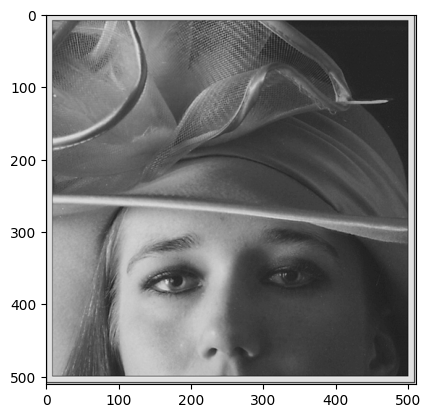

In [120]:
# changed the type of the data from uint8 to float 32 and then devided by 255 to normalize between 0 and 1
low_contrast_img_normalized = cv.imread("imgs/low_contrast.jpg", cv.IMREAD_GRAYSCALE).astype(np.float32)/255
plt.imshow(low_contrast_img_normalized,cmap='gray')

### B) Describe each of the two methods (Logarithmic correction and Gamma correction) for contrast stretching

#### Log Correction 
Mathematically, log transformations can be expressed as s = clog(1+r). Here, s is the output intensity, r>=0 is the input intensity of the pixel, and c is a scaling constant. c is given by 255/(log (1 + m)), where m is the maximum pixel value in the image. It is done to ensure that the final pixel value does not exceed (L-1), or 255. Practically, log transformation maps a narrow range of low-intensity input values to a wide range of output values. Consider the following input image.

#### Gamma Correction 
Power-law (gamma) transformations can be mathematically expressed ass = cr^gamma. Gamma correction is important for displaying images on a screen correctly, to prevent bleaching or darkening of images when viewed from different types of monitors with different display settings. This is done because our eyes perceive images in a gamma-shaped curve, whereas cameras capture images in a linear fashion. Below is the Python code to apply gamma correction.

### C) Apply logarithmic contrast stretching to 'low_contrast.jpg' using the formula:
enhanced_pixel_value = c * log(1 + original_pixel_value)
Choose an appropriate constant 'c' to scale the enhanced pixel values to the
range (0 to 1).

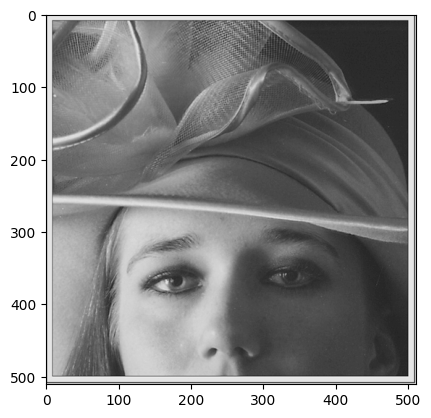

In [119]:
# Apply log transform. 
c = (np.log(1 + np.max(low_contrast_img_normalized)))
log_streched_low_contrast = c * np.log(1 + low_contrast_img_normalized) 
plt.imshow(log_streched_low_contrast,cmap='gray')

### D) Apply gamma correction to 'low_contrast.jpg'. Choose a suitable 'gamma' value for enhancing the image's contrast.

Text(0.5, 1.0, 'gamma 2.2')

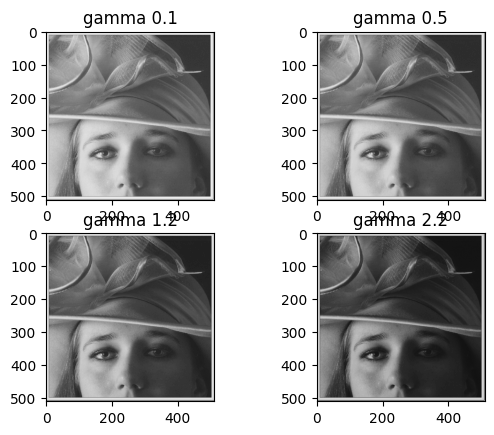

In [118]:
# Trying 4 gamma values.
gamma = 0.1
gamma_corrected_1 = np.array(low_contrast_img_normalized ** gamma)
gamma = 0.5
gamma_corrected_2 = np.array(low_contrast_img_normalized ** gamma)
gamma = 1.2
gamma_corrected_3 = np.array(low_contrast_img_normalized ** gamma)
gamma = 2.2
gamma_corrected_4 = np.array(low_contrast_img_normalized ** gamma)
f, subplt = plt.subplots(ncols=2,nrows=2)
subplt[0,0].imshow(gamma_corrected_1,cmap='gray')
subplt[0,1].imshow(gamma_corrected_2,cmap='gray')
subplt[1,0].imshow(gamma_corrected_3,cmap='gray')
subplt[1,1].imshow(gamma_corrected_4,cmap='gray')
subplt[0,0].set_title("gamma 0.1")
subplt[0,1].set_title("gamma 0.5")
subplt[1,0].set_title("gamma 1.2")
subplt[1,1].set_title("gamma 2.2")

### E) After applying both contrast enhancement techniques, plot histograms for the original and enhanced images on a single figure.
X-axis: Pixel intensity values (0 to 1) 

Y-axis: Frequency of each intensity value in the image

Text(0.5, 1.0, 'gamma')

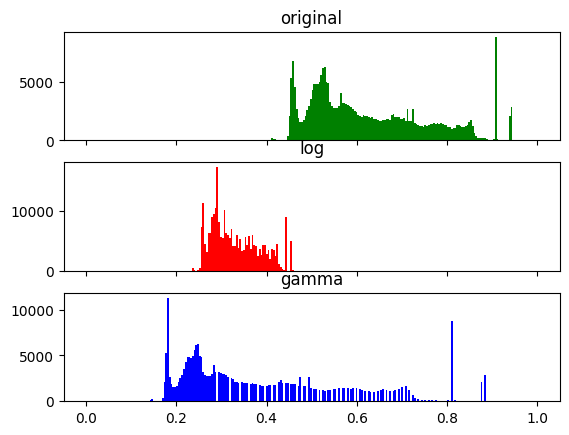

In [155]:
f, con_subplt = plt.subplots(3,sharex=True)

con_subplt[0].hist(low_contrast_img_normalized.ravel(), bins=256, range=(0.0, 1.0),color='green')
con_subplt[0].set_title('original')
con_subplt[1].hist(log_streched_low_contrast.ravel(), bins=256, range=(0.0, 1.0), color='red')
con_subplt[1].set_title('log')
con_subplt[2].hist(gamma_corrected_4.ravel(), bins=256, range=(0.0, 1.0), color='blue')
con_subplt[2].set_title('gamma')


## Question 3
### Histogram equalization is a technique widely used in image processing to enhance the contrast of an image by redistributing the intensity values. In this question, you will explore the concept of histogram equalization step by step.

#### A) Normalize the image to ensure its pixel values are within range (0 to 1).

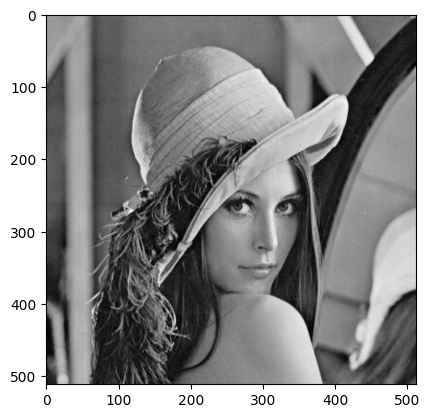

In [165]:
cap = cv.VideoCapture("imgs/lena_gray.gif")
ret, lena_gray_img = cap.read()
lena_gray_img = cv.cvtColor(lena_gray_img, cv.COLOR_BGR2GRAY)
cap.release()
hist_equalization_img = lena_gray_img.astype(np.float32) / 255
plt.imshow(hist_equalization_img, cmap='gray')

#### B) Calculate and plot the histogram of the original image. Analyze the histogram to understand the distribution of pixel intensities.

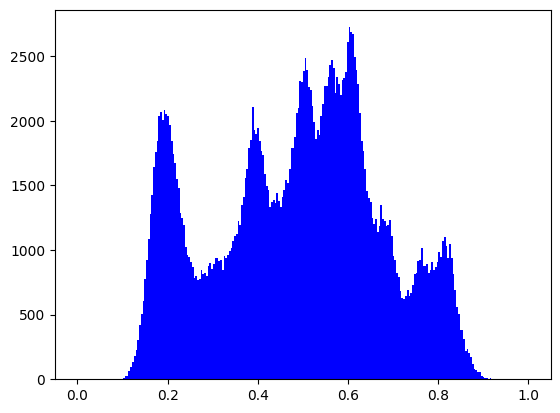

In [175]:
hist_equalization_img_histogram, lena_bins, len_patches = plt.hist(hist_equalization_img.ravel(), bins=256, range=(0.0, 1.0), color='blue')

#### C) Implement the histogram equalization algorithm on the original image then calculate and plot the histogram of the equalized image.

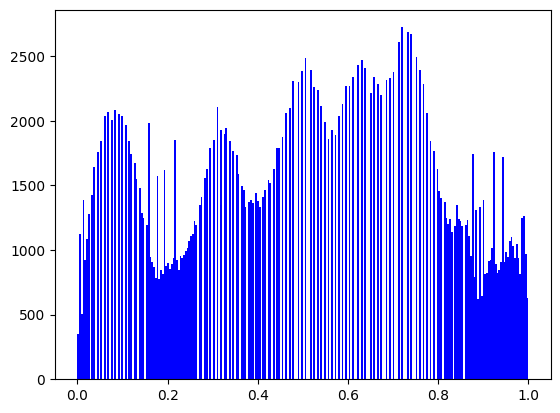

In [180]:
hist_equalization_img_equilized = cv.equalizeHist((hist_equalization_img *255).astype(np.uint8)).astype(np.float32) / 255
hist_equalization_img_equilized_histogram, equalized_bins, equalized_pathces = plt.hist(hist_equalization_img_equilized.ravel(), bins=256, range=(0.0, 1.0), color='red')

#### D) Display the original image, the histogram-equalized image, and their respective histograms side by side for comparison.

(array([ 349., 1127.,  508., ..., 1260.,  971.,  628.]),
 array([0.        , 0.00390625, 0.0078125 , ..., 0.9921875 , 0.99609375,
        1.        ]),
 <BarContainer object of 256 artists>)

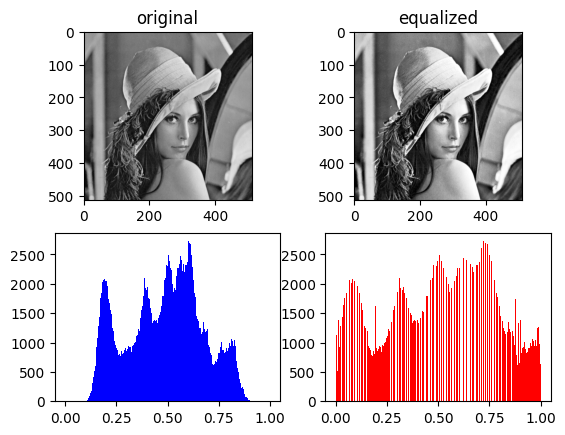

In [184]:
f, hist_equalization_subplt = plt.subplots(2,2)
hist_equalization_subplt[0,0].imshow(hist_equalization_img,cmap='gray')
hist_equalization_subplt[0,0].set_title("original")
hist_equalization_subplt[0,1].imshow(hist_equalization_img_equilized,cmap='gray')
hist_equalization_subplt[0,1].set_title("equalized")
hist_equalization_subplt[1,0].hist(hist_equalization_img.ravel(), bins=256, range=(0.0, 1.0), color='blue')
hist_equalization_subplt[1,1].hist(hist_equalization_img_equilized.ravel(), bins=256, range=(0.0, 1.0), color='red')

#### E) Analyze and compare the visual differences between the original and equalized image. Discuss how histogram equalization has affected the distribution of pixel intensities.

the equalized image seems brighter and has more contrast in compare to the original image.To make it clearer, from the original image histogram above, you can see that the pixels seem clustered around the middle of the available range of intensities. What Histogram Equalization does is to stretch out this range. After applying the equalization, we get a histogram like the equalized image histogram above.

## Question 4 (15 points)
### The image square.gif contains two square objects. Pixels in the first square have the intensity of 150, while those in the second square have the intensity of 220. Read the image and do the following:

#### A) The small square is to be translated by 40 pixels in both directions.

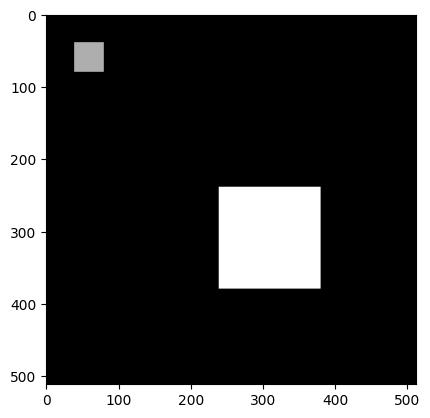

In [185]:
cap = cv.VideoCapture("imgs/square.gif")
ret, square_image = cap.read()
square_image = cv.cvtColor(square_image, cv.COLOR_BGR2GRAY)
cap.release()
plt.imshow(square_image,cmap='gray')

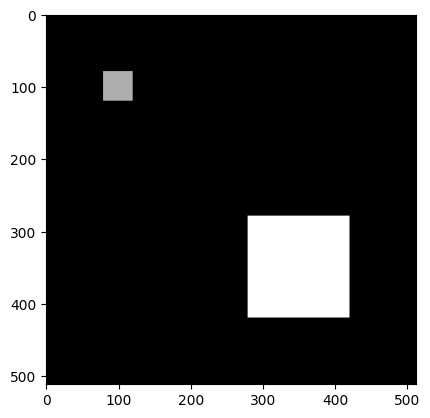

In [203]:
first_square_points = np.array([[0,0],[0,0],[0,0]]).astype(np.float32)
second_square_points = np.array([[0,0],[0,0],[0,0],[0,0]]).astype(np.float32)
for i in range(square_image.shape[0] -1 ):
    for j in range(square_image.shape[1] - 1):
        if square_image[i-1,j] == 0 and square_image[i, j-1] == 0 and square_image[i-1,j-1] == 0 and square_image[i,j] == 150:
            first_square_points[0]=[i,j]
        if square_image[i+1, j] == 0 and square_image[i, j-1] == 0 and square_image[i + 1, j-1] == 0 and square_image[i,j] == 150:
            first_square_points[1]=[i,j]
        if square_image[i-1,j] == 0 and square_image[i, j+1] == 0 and square_image[i+1, j+1] == 0 and square_image[i,j] == 150:
            first_square_points[2]=[i,j]
        if square_image[i-1,j] == 0 and square_image[i, j-1] == 0 and square_image[i-1,j-1] == 0 and square_image[i,j] == 220:
            second_square_points[0]=[i,j]
        if square_image[i+1, j] == 0 and square_image[i, j-1] == 0 and square_image[i + 1, j-1] == 0 and square_image[i,j] == 220:
            second_square_points[1]=[i,j]
        if square_image[i-1,j] == 0 and square_image[i, j+1] == 0 and square_image[i+1, j+1] == 0 and square_image[i,j] == 220:
            second_square_points[2]=[i,j]
        if square_image[i+1,j] == 0 and square_image[i, j+1] == 0 and square_image[i+1, j+1] == 0 and square_image[i,j] == 220:
            second_square_points[3]=[i,j]
first_square_dest_points = first_square_points + 40
M = cv.getAffineTransform(first_square_points, first_square_dest_points)
first_square_moved_image = cv.warpAffine(square_image, M, (square_image.shape[1], square_image.shape[0]))

plt.imshow(first_square_moved_image, cmap='gray')


#### B) The large square is to be rotated by 60 degrees counter clockwise.

[[239. 239.]
 [379. 239.]
 [239. 379.]
 [379. 379.]]


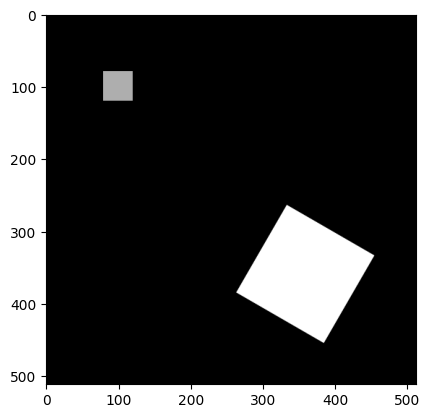

In [225]:
print(second_square_points)
second_square_croped_image = np.ones((int(second_square_points[1,0] - second_square_points[0,0]),int(second_square_points[2,1] - second_square_points[0,1])),np.uint8)*220
second_square_croped_image = np.pad(second_square_croped_image, pad_width=50, mode='constant', constant_values=0)
M2 = cv.getRotationMatrix2D((second_square_croped_image.shape[0]/2,second_square_croped_image.shape[1]/2), 60, 1)
second_square_image_cropped_rotated = cv.warpAffine(second_square_croped_image, M2, (second_square_croped_image.shape[1], second_square_croped_image.shape[0]))
second_square_image_rotated = first_square_moved_image
second_square_image_rotated[int(second_square_points[0,0]):int(second_square_points[0,0])+second_square_croped_image.shape[0],int(second_square_points[0,0]):int(second_square_points[0,0])+second_square_croped_image.shape[1]] = second_square_image_cropped_rotated
plt.imshow(second_square_image_rotated,cmap='gray')

Write the code to perform these transformations. Show the image before and
after transformation on the same figure.
you can see the original form of the image below:

Text(0.5, 1.0, 'transormed')

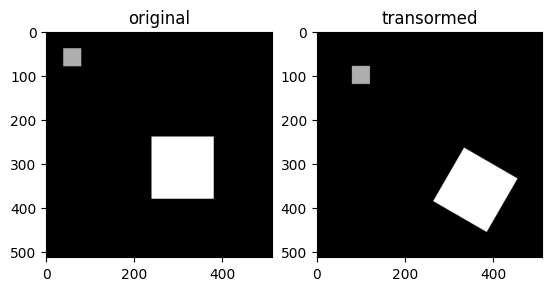

In [228]:
f, square_subplts = plt.subplots(ncols=2)
square_subplts[0].imshow(square_image,cmap='gray')
square_subplts[0].set_title('original')
square_subplts[1].imshow(second_square_image_rotated,cmap='gray')
square_subplts[1].set_title('transormed')

## Question 5 (10 points)
### For the image skeleton.gif, try to modify the normalized image using the following functions:

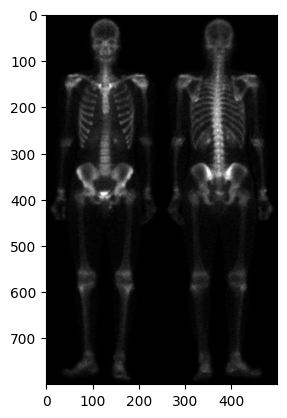

In [231]:
cap = cv.VideoCapture("imgs/skeleton.gif")
ret, skeleton_image = cap.read()
skeleton_image_normalized = cv.cvtColor(skeleton_image, cv.COLOR_BGR2GRAY).astype(np.float32) /255
cap.release()
plt.imshow(skeleton_image_normalized,cmap='gray')

#### A) g(x,y) = e^cf(x,y):

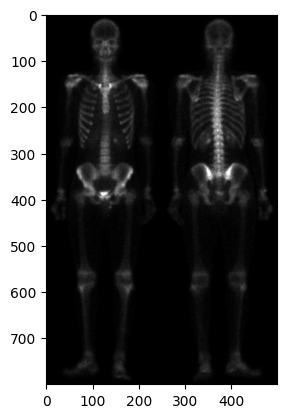

In [234]:
c = (np.log(1 + np.max(skeleton_image_normalized)))
skeleton_image_exp = np.zeros((skeleton_image_normalized.shape[0],skeleton_image_normalized.shape[1]))
for i in range(skeleton_image_normalized.shape[0]):
    for j in range(skeleton_image_normalized.shape[1]):
        skeleton_image_exp[i,j] = math.exp(c*skeleton_image_normalized[i,j])
plt.imshow(skeleton_image_exp, cmap='gray')

#### B) g(x,y) = clog10[f(x,y)+1]:

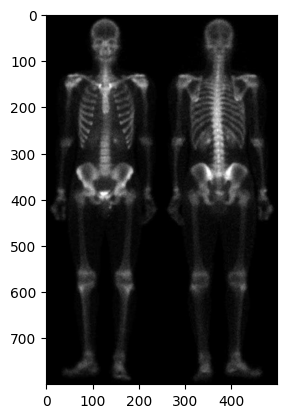

In [236]:
skeleton_image_clog = np.zeros((skeleton_image_normalized.shape[0],skeleton_image_normalized.shape[1]))
for i in range(skeleton_image_normalized.shape[0]):
    for j in range(skeleton_image_normalized.shape[1]):
        skeleton_image_clog[i,j] = c * math.log10(skeleton_image_normalized[i,j] + 1)
plt.imshow(skeleton_image_clog, cmap='gray')

#### C) g(x,y) = {f(x,y) = f(x,y) if f(x,y) < 0.1;f(x,y) = 2*f(x,y) else} :

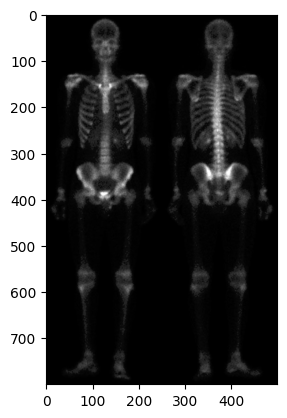

In [237]:
skeleton_image_double = np.zeros((skeleton_image_normalized.shape[0],skeleton_image_normalized.shape[1]))
for i in range(skeleton_image_normalized.shape[0]):
    for j in range(skeleton_image_normalized.shape[1]):
        if(skeleton_image_normalized[i,j] < 0.1):
            skeleton_image_double[i,j] = skeleton_image_normalized[i,j]
        else:
            skeleton_image_double[i,j] = 2 * skeleton_image_normalized[i,j]
plt.imshow(skeleton_image_double, cmap='gray')

#### Which function produces the best result in your opinion? Discuss your results

the log10 function produces better results because the details in the resulted image are more preserveable where as in the other two functions the resulting images either lose details or does not have any significant changes